# $\mathbf{CODEUP}$ $\mathbf{CURRICULUM}$ $\mathbf{ACCESS}$ $\mathbf{ANALYSIS}$
## *Lesson access details by user and cohort (plus who is shady, and who is a maybe)* 
#### This notebook is in support of an email communication and slide prepared by Staff Data Science Team.
$\rightarrow$ Delivered on 6/13/2022 by: Ray Cerna, Jen Eyring, Lochlyn Laskowski, Julessa Morris, Ryan Miller

-----

# $\bullet$ Executive Summary

### Question:
### Actions: 
### Conclusions:  
### Recommendations/Next Steps:

----

# $\bullet$ Libraries Used

Common DS Libraries

In [1]:
# For data analysis:
import numpy as np
import pandas as pd

# Graphs/Visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# For Statistics and Hypothesis Testing:
import scipy.stats as stats

Internally Created Helper Functions

In [2]:
# For acquiring the dataset from the Cal Tech Database:
import acquire

# For acquiring, preparing/cleaning data while also creating dataframes with 
import wrangle

# Various functions for exploring the data
import explore

Others

In [3]:
#Ignore Warnings:
import warnings
warnings.filterwarnings('ignore')

# reloads import files each time a cell is ran (makes your life easier)
%load_ext autoreload
%autoreload 2

# Shows all columns of a dataframe
pd.set_option('display.max_columns', None)

# $\bullet$ Analysis

### Our task was to answer a serious of questions about those accessing the Codeup curriculum.
### To begin, loading the dataframes using our wrangle function, which acquires the data directly from the Codeup MySQL database.  
#### - Query and wrangle details can be found in the wrangle.py function.
#### - All dataframes have the same columns and datatypes.

In [4]:
df, df_staff, df_multicohort, df_unimputed, df_non_curriculum, df_outliers = wrangle.full_wrangle()

This returned the following dataframes (reassign if you missed any):


,Description,Record Count,Percent of Raw df
Dataframe,,,
df,Fully cleaned dataframe,509409,56.6%
df_staff,Cohort == Staff,84031,9.33%
df_multicohort,Users listed in more than one cohort,22708,2.52%
df_unimputed,Users with unknown/unimputable cohorts,45904,5.1%
df_non_curriculum,"Accessess not related to the curriculum, i.e. directories, images",116539,12.9%
df_outliers,Accesses meeting outlier conditions,121626,13.5%


##### The core 'df' dataframe is used for most of the user analysis, however other dataframes are integrated in when needed (namely for outlier/anomaly detection).

## Question 1: Which lesson appears to attract the most traffic consistently across cohorts (per program)?

We analyzed each program seperately:

In [5]:
# Seperate analysis df into Web Dev and DS
wd = df[df.program_type == 'Web Development']
ds = df[df.program_type == 'Data Science']

### Examining Web Development

To determine the top lesson *across* cohorts, we found the top 3 lessons for each cohort, then tallied up how many times each of those lessons appears in one of the top 3:

In [6]:
# Call function that prints out a program's top 10 lessons overall, then the top three lessons
# accessed by each cohort (with counts)
wd_tl = explore.lesson_top_three(wd)
wd_tl

Top ten lessons:
----------
Not Lesson                                                                   97362
mysql.tables                                                                  5477
javascript-i.introduction.working-with-data-types-operators-and-variables     5312
mysql.databases                                                               5169
javascript-i.functions                                                        5163
javascript-i.javascript-with-html                                             5157
html-css.elements                                                             5046
mysql.users                                                                   4858
html-css.css-ii.bootstrap-grid-system                                         4843
java-iii.jsp-and-jstl                                                         4840
Name: lesson, dtype: int64


,Cohort,#1 lesson,#1 lesson count,#2 lesson,#2 lesson count,#3 lesson,#3 lesson count
0,Andromeda,javascript-i.introduction.working-with-data-types-operators-and-variables,263.0,mysql.tables,262.0,spring.fundamentals.repositories,259.0
1,Apex,java-i.syntax-types-and-variables,360.0,java-ii.object-oriented-programming,355.0,mysql.tables,348.0
2,Arches,javascript-i.loops,66.0,html-css.elements,65.0,javascript-ii.promises,63.0
3,Badlands,content.php_ii.command-line,6.0,content.php_i,5.0,content.php_ii.control-structures-i,5.0
4,Bash,javascript-i.introduction,260.0,javascript-i.javascript-with-html,213.0,javascript-i.introduction.working-with-data-types-operators-and-variables,211.0
5,Betelgeuse,html-css.elements,382.0,html-css.css-ii.bootstrap-grid-system,341.0,javascript-i.javascript-with-html,274.0
6,Ceres,javascript-i.introduction.working-with-data-types-operators-and-variables,372.0,html-css.forms,353.0,html-css.elements,351.0
7,Deimos,html-css.css-ii.bootstrap-introduction,340.0,html-css.css-ii.bootstrap-grid-system,324.0,mysql.tables,311.0
8,Europa,html-css.elements,340.0,html-css.css-i.selectors-and-properties,299.0,mysql.tables,285.0
9,Fortuna,mysql.tables,303.0,mysql.basic-statements,286.0,java-iii.jsp-and-jstl,275.0


In [7]:
# Finds the top functions across all cohorts
a1 = wd_tl['#1 lesson'].value_counts()
b1 = wd_tl['#2 lesson'].value_counts()
c1 = wd_tl['#3 lesson'].value_counts() 
(a1 + b1 + c1).nlargest()

mysql.tables                                                                 11.0
html-css.elements                                                             7.0
javascript-i.introduction.working-with-data-types-operators-and-variables     7.0
javascript-i.javascript-with-html                                             4.0
1-fundamentals.1.1-intro-to-data-science                                      NaN
dtype: float64

> ### Key Takeaway: Lesson 'mysql/tables' was the most accessed overall, as well as the consistently the highest amongst the web development cohorts.
- ##### We also looked at the cohorts on a Unit (main topic) basis, and 'javascript-i' is the most accessed unit across cohorts.

### Examining Data Science

In [8]:
ds_tl = explore.lesson_top_three(ds)
ds_tl

Top ten lessons:
----------
classification.overview                     1310
1-fundamentals.1.1-intro-to-data-science    1270
classification.scale_features_or_not.svg    1138
sql.mysql-overview                          1008
fundamentals.intro-to-data-science           946
6-regression.1-overview                      848
10-anomaly-detection.1-overview              573
3-sql.1-mysql-overview                       543
anomaly-detection.overview                   523
stats.compare-means                          510
Name: lesson, dtype: int64


,Cohort,#1 lesson,#1 lesson count,#2 lesson,#2 lesson count,#3 lesson,#3 lesson count
0,Bayes,1-fundamentals.1.1-intro-to-data-science,573,6-regression.1-overview,411,10-anomaly-detection.1-overview,289
1,Curie,6-regression.1-overview,432,1-fundamentals.1.1-intro-to-data-science,344,3-sql.1-mysql-overview,333
2,Darden,classification.overview,858,classification.scale_features_or_not.svg,713,sql.mysql-overview,573
3,Easley,classification.scale_features_or_not.svg,283,classification.overview,265,fundamentals.intro-to-data-science,210


In [9]:
a3 = ds_tl['#1 lesson'].value_counts()
b3 = ds_tl['#2 lesson'].value_counts()
c3 = ds_tl['#3 lesson'].value_counts()
(a3 + b3 + c3).nlargest()

1-fundamentals.1.1-intro-to-data-science   NaN
10-anomaly-detection.1-overview            NaN
3-sql.1-mysql-overview                     NaN
6-regression.1-overview                    NaN
classification.overview                    NaN
dtype: float64

This did not work because it counts missing values as NaNs that wipe the whole row out.  Looking just at columns 1 and two:

In [10]:
(a3 + b3)

1-fundamentals.1.1-intro-to-data-science    2
6-regression.1-overview                     2
classification.overview                     2
classification.scale_features_or_not.svg    2
dtype: int64

> ### Key Takeaway: 'classification/overview is the is the highest accessed overall, and also scores high across cohorts with introduction/fundamentals close behind.  Interestingly, an image snuck in here and ranked very highly (classification/scale_features_or_no.svg) which means it must be a very good image!
> #### Interesting note: It seems the path syntax changed from Bayes to Easely, as evidenced by the fundamentals having two separate high scoring lessons.
- ##### Additionally, when looking at top units, classification was accessed the most, in line with the most accessed lesson.

## Question 2: Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

### Web Development

In [11]:
full_df = pd.concat([df, df_staff, df_multicohort, df_unimputed, df_non_curriculum, df_outliers])
full_df = full_df.loc[full_df['cohort'] != 'Staff']
#create webdev df
webdev = full_df.loc[full_df['program_type'] == 'Web Development']

#get the most accessed lessons
pd.DataFrame(webdev.path.value_counts().head(10)).index

#subset by the top 5 pages
webdev_pop = webdev[(webdev.path == 'javascript-i') | 
                    (webdev.path == 'html-css')  | 
                    (webdev.path == 'java-iii') | 
                    (webdev.path == 'java-ii')| 
                    (webdev.path == 'spring')]


webdev_pop = pd.crosstab(webdev_pop.cohort, webdev_pop.path, margins = True, margins_name = 'total')
webdev_pop

path,html-css,java-ii,java-iii,javascript-i,spring,total
cohort,,,,,,
Andromeda,389,398,433,517,487,2224
Apex,738,666,663,669,600,3336
Arches,215,167,153,294,192,1021
Badlands,2,0,0,1,0,3
Bash,340,316,372,460,414,1902
Betelgeuse,457,481,472,717,299,2426
Ceres,766,681,682,1003,562,3694
Deimos,773,511,523,896,533,3236
Europa,353,375,451,506,324,2009


> ### Key Takeaway: The javascript-i was the highest accessed lesson overall in the Web Development cohorts and had a significantly higher access count compared to the next most frequented lessons. 

### Data Science

In [12]:
# create data science df
ds = full_df.loc[full_df['program_type'] == 'Data Science']

#get top results
pd.DataFrame(ds.path.value_counts().head(20)).index

#subset by the top 5 pages
ds_pop = ds[(ds.path == 'classification/overview') | 
                    (ds.path == '1-fundamentals/1.1-intro-to-data-science') | 
                    (ds.path == 'sql/mysql-overview') | 
                    (ds.path == 'fundamentals/intro-to-data-science') | 
                    (ds.path == '6-regression/1-overview')] 

ds_pop = pd.crosstab(ds_pop.cohort, ds_pop.path, margins = True, margins_name = 'total')

ds_pop

path,1-fundamentals/1.1-intro-to-data-science,6-regression/1-overview,classification/overview,fundamentals/intro-to-data-science,sql/mysql-overview,total
cohort,,,,,,
Bayes,640,521,35,25,27,1248
Curie,461,595,136,96,125,1413
Darden,460,8,1109,305,774,2656
Easley,8,0,445,372,295,1120
Florence,64,0,60,615,203,942
total,1633,1124,1785,1413,1424,7379


> ### Key Takeaway: The 'classification/overview' has the highest overall access in the Data Science program, with Darden having the highest cohort access. Curie and Bayes have very little access, so this lesson appears glossed over. 
> #### Interesting note: The '6-regression/1-overview' lesson had no access from Easely or Florence, so this may be a curriculum topic that was added after students in those cohorts graduated the program. The 'sql/mysql-overview' lesson seems comparatively glossed over by the Bayes cohort compared to other cohorts.
- ##### The curriculum may have changed, which is why there are two fundamentals/introduction paths and some cohorts have flipped curriculum access counts for the two similarly named pages.

## Question 3: Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

### Examining Web Dev students with low access counts.

In [13]:
#using explore function to call in WebDev user counts (ordered by lowest access counts)
explore.wd_lowest_access_counts(df)

user_id
278     3
340    13
963    15
41     22
371    24
529    29
967    30
978    32
36     36
57     42
543    43
56     44
45     51
46     51
975    59
969    60
65     63
33     63
250    63
253    71
dtype: int64

To get a better visualization of what these students access counts look like. (note: pay attention to the number of occurences as these will differ when we get to Data Science students)

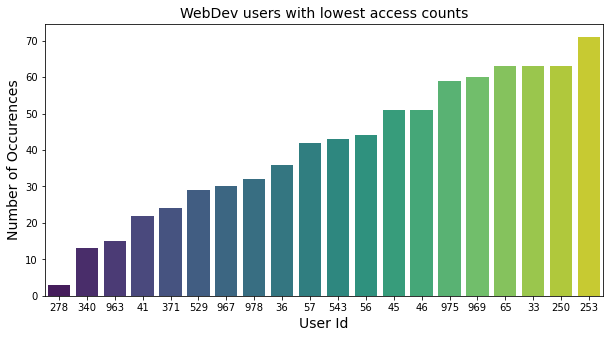

In [14]:
#using explore function to call in barplot of lowest access counts per WebDev students:
explore.wd_lowest_barplot(df)

### Examining Data Science students with low access counts.

In [15]:
#using explore function to call in WebDev user counts (ordered by lowest access counts)
explore.ds_lowest_access_counts(df)

user_id
902    118
780    145
577    190
901    201
683    205
914    235
897    241
949    288
846    288
910    313
477    327
907    328
693    345
896    354
575    355
583    356
470    365
587    372
908    386
616    401
dtype: int64

And now visualizing get what DS students low access counts look like.

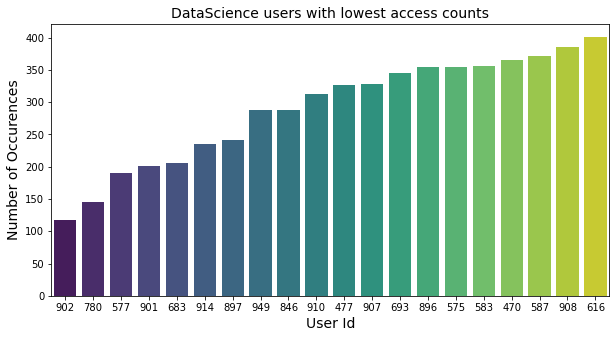

In [16]:
#using explore function to call in barplot of lowest access counts per Data Science students:
explore.ds_lowest_barplot(df)

### Examples of individual students and their 'why' of low access counts:

|User_id|program_type|number of access counts| possible reasons why|
|:-------|:--------|:----------|:----------|
| 340 | WebDev | 13 |student left course|
| 902| Data Science| 118 | student only accessed 2months; possibly left?|
| 963 | WebDev | 30| student left course|
| 978| WebDev |32| student left course|
| 529| WebDev |29| student left course |
| 543 | WebDev|43| student accessed throughout course, just not much|
| 45 |  WebDev |51| only accessed last half of curriculum|
| 780 | Data Science | 145| low curriculm while active student;more access happened later|

### Overall Look at Access while students were consider 'active':

<function explore.user_stacked_plot(columns_to_plot, title, df)>

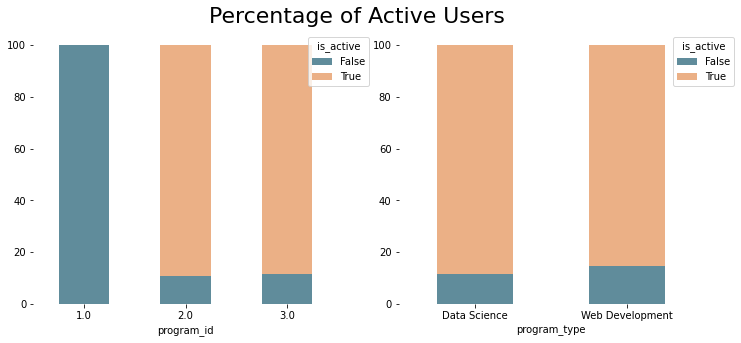

In [17]:
#explore function that shows access counts when students are and are not active in their cohort dates:
columns_to_plot= ['program_id','program_type']
explore.user_stacked_plot(columns_to_plot, "Percentage of Active Users", df)

> ### Key Takeaway 1: Data Science students are accessing their curriculums more than WebDev. 
> #### Question: Does this mean certain topics need to be covered more in class or do DS staff just teach more from the curriculum?
> ### Key Takeaway 2: Most low-count curriculum access is due to students dropping course.
> #### Question: Could we find any patterns with the when/where of students leaving courses?

## Question 4: Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

In [18]:
full_df.loc[full_df['user_id'] == 88].head()

,accessed,path,ip,user_id,program_id,program_type,cohort,start_date,end_date,lesson,hour
5891,2018-02-05 21:40:45,index.html,172.5.98.113,88,NaN,Unknown,NaN,NaT,NaT,Not Lesson,21
11130,2018-02-17 20:11:52,index.html,72.181.108.134,88,NaN,Unknown,NaN,NaT,NaT,Not Lesson,20
11131,2018-02-17 20:12:09,prework/getting-started,72.181.108.134,88,NaN,Unknown,NaN,NaT,NaT,prework.getting-started,20
11132,2018-02-17 20:12:14,prework/fundamentals,72.181.108.134,88,NaN,Unknown,NaN,NaT,NaT,prework.fundamentals,20
11133,2018-02-17 20:12:20,prework/vocab/decimal-number-system,72.181.108.134,88,NaN,Unknown,NaN,NaT,NaT,prework.vocab.decimal-number-system,20


In [19]:
#only accessed for 6 minutes
full_df.loc[full_df['user_id'] == 697].head()

,accessed,path,ip,user_id,program_id,program_type,cohort,start_date,end_date,lesson,hour
511517,2020-07-13 15:20:27,/,136.50.70.27,697,3.0,Data Science,Darden,2020-07-13,2021-01-12,.,15
511520,2020-07-13 15:20:50,1-fundamentals/modern-data-scientist.jpg,136.50.70.27,697,3.0,Data Science,Darden,2020-07-13,2021-01-12,1-fundamentals.modern-data-scientist.jpg,15
511521,2020-07-13 15:20:50,1-fundamentals/AI-ML-DL-timeline.jpg,136.50.70.27,697,3.0,Data Science,Darden,2020-07-13,2021-01-12,1-fundamentals.AI-ML-DL-timeline.jpg,15
511523,2020-07-13 15:20:59,1-fundamentals/DataToAction_v2.jpg,136.50.70.27,697,3.0,Data Science,Darden,2020-07-13,2021-01-12,1-fundamentals.DataToAction_v2.jpg,15
511525,2020-07-13 15:21:02,1-fundamentals/AI-ML-DL-timeline.jpg,136.50.70.27,697,3.0,Data Science,Darden,2020-07-13,2021-01-12,1-fundamentals.AI-ML-DL-timeline.jpg,15


In [20]:
#single access in 2018
full_df.loc[full_df['user_id'] == 177]

,accessed,path,ip,user_id,program_id,program_type,cohort,start_date,end_date,lesson,hour
48589,2018-05-07 20:12:30,/,72.181.97.35,177,1.0,Web Development,Ike,2016-01-20,2016-05-12,.,20
48590,2018-05-07 20:12:49,content/laravel/intro,72.181.97.35,177,1.0,Web Development,Ike,2016-01-20,2016-05-12,content.laravel.intro,20
48591,2018-05-07 20:12:49,content/laravel/intro/gitbook/images/favicon.ico,72.181.97.35,177,1.0,Web Development,Ike,2016-01-20,2016-05-12,Not Lesson,20


In [21]:
#only two dates, access was under a minute.
full_df.loc[full_df['user_id'] == 399].head()

,accessed,path,ip,user_id,program_id,program_type,cohort,start_date,end_date,lesson,hour
213112,2019-04-13 16:37:46,/,24.227.245.186,399,1.0,Web Development,Quincy,2017-06-05,2017-09-22,.,16
221242,2019-04-30 03:09:36,/,70.122.37.185,399,1.0,Web Development,Quincy,2017-06-05,2017-09-22,.,3
213113,2019-04-13 16:37:57,content/jquery/ajax,24.227.245.186,399,1.0,Web Development,Quincy,2017-06-05,2017-09-22,content.jquery.ajax,16
213114,2019-04-13 16:37:57,content/jquery/ajax/gitbook/images/favicon.ico,24.227.245.186,399,1.0,Web Development,Quincy,2017-06-05,2017-09-22,Not Lesson,16
213118,2019-04-13 16:38:14,content/jquery/ajax/ajax-intro.html,24.227.245.186,399,1.0,Web Development,Quincy,2017-06-05,2017-09-22,Not Lesson,16


In [22]:
#late access times, on two different days
full_df.loc[full_df['user_id'] == 246]

,accessed,path,ip,user_id,program_id,program_type,cohort,start_date,end_date,lesson,hour
103012,2018-08-23 23:24:13,index.html,107.77.210.31,246,1.0,Web Development,Lassen,2016-07-18,2016-11-10,Not Lesson,23
103013,2018-08-23 23:24:37,content/mysql/intro-to-mysql,107.77.210.31,246,1.0,Web Development,Lassen,2016-07-18,2016-11-10,content.mysql.intro-to-mysql,23
103014,2018-08-23 23:24:37,content/mysql/intro-to-mysql/gitbook/images/favicon.ico,107.77.210.31,246,1.0,Web Development,Lassen,2016-07-18,2016-11-10,Not Lesson,23
103017,2018-08-24 00:00:18,content/mysql/intro-to-mysql/databases.html,107.77.210.31,246,1.0,Web Development,Lassen,2016-07-18,2016-11-10,Not Lesson,0


In [23]:
#san antonio ip address, benign threat, but suspicious probably used by a bot, 
#weird random access times, barely viewed subtantive content

full_df.loc[full_df['ip'] == '99.57.17.35']

,accessed,path,ip,user_id,program_id,program_type,cohort,start_date,end_date,lesson,hour
27257,2018-03-18 11:58:29,/,99.57.17.35,88,NaN,Unknown,NaN,NaT,NaT,.,11
55508,2018-05-12 12:11:27,/,99.57.17.35,88,NaN,Unknown,NaN,NaT,NaT,.,12
55509,2018-05-12 12:11:34,/,99.57.17.35,88,NaN,Unknown,NaN,NaT,NaT,.,12
96969,2018-08-02 23:47:27,/,99.57.17.35,88,NaN,Unknown,NaN,NaT,NaT,.,23
143456,2018-10-19 20:36:54,/,99.57.17.35,88,NaN,Unknown,NaN,NaT,NaT,.,20
143457,2018-10-19 20:37:01,/,99.57.17.35,88,NaN,Unknown,NaN,NaT,NaT,.,20
143458,2018-10-19 20:37:24,/,99.57.17.35,88,NaN,Unknown,NaN,NaT,NaT,.,20
143459,2018-10-19 20:37:27,content/html-css,99.57.17.35,88,NaN,Unknown,NaN,NaT,NaT,content.html-css,20
143460,2018-10-19 20:37:28,content/html-css/gitbook/images/favicon.ico,99.57.17.35,88,NaN,Unknown,NaN,NaT,NaT,Not Lesson,20
143461,2018-10-19 20:37:28,content/html-css/forms.html,99.57.17.35,88,NaN,Unknown,NaN,NaT,NaT,content.html-css.forms.html,20


> ### Key Takeaway: There are some users that have suspicious activity. User 88 shows up across multiple cohorts and accesses both Web Development and Data Science curriculum, and some access happens in rapid succession, other user_ids, namely, 697, 177, 399, 246, had few or single access days, and in some cases viewed no substantive content so these users may have been bots. 
> #### Interesting note: Some user_ids that crossed multiple cohorts appeared to start in one cohort and finish in another, perhaps due to leave of absence. 
- ##### One notable IP address, 99.57.17.35, barely viewed substantive content and was used solely by a user_id that has suspicious activity overall, the user_id associated with IP address may have been scraping the site.

## Question 5:  At some point in 2019, the ability for students and alumni to access both curriculum's (web development to data science, data science to web development) should have been shut off. Do you see any evidence of that happening? Did it happen before?

In [24]:
# join df and outliers as one dataframe
joint = pd.concat([df, df_outliers])

In [25]:
# removed user 782 since they are incorrectly identified as a DS student
joint = joint[joint.user_id != 782]

In [26]:
# create web development and datas cience dataframes
wd_df = joint[joint.program_type=='Web Development']
ds_df = joint[joint.program_type=='Data Science']

In [27]:
# determine what a data science course is using science
wd_to_ds_access_df = wd_df[wd_df.path.str.contains('science')]

In [28]:
wd_to_ds_access_df = wd_to_ds_access_df.set_index(wd_to_ds_access_df.accessed)

In [29]:
# view daily cross-acess in web development to data science
daily_wd_to_ds_access_df = wd_to_ds_access_df.resample('D').count()

In [30]:
# create data for wd students viewing ds curriculum after 2019
after_2019 = wd_to_ds_access_df['2019-12-31':]

In [31]:
# determine what a web development course is using java
ds_to_wd_access_df=ds_df[ds_df.path.str.contains('java')]

In [32]:
# set index to datetime for resampling
ds_to_wd_access_df=ds_to_wd_access_df.set_index(ds_to_wd_access_df.accessed)

In [33]:
# create data for wd students viewing ds curriculum after 2019
ds_after_2019 = ds_to_wd_access_df['2019-12-31':]

In [34]:
# resample data to daily view
daily_ds_to_wd_access_df=ds_to_wd_access_df.resample('D').count()

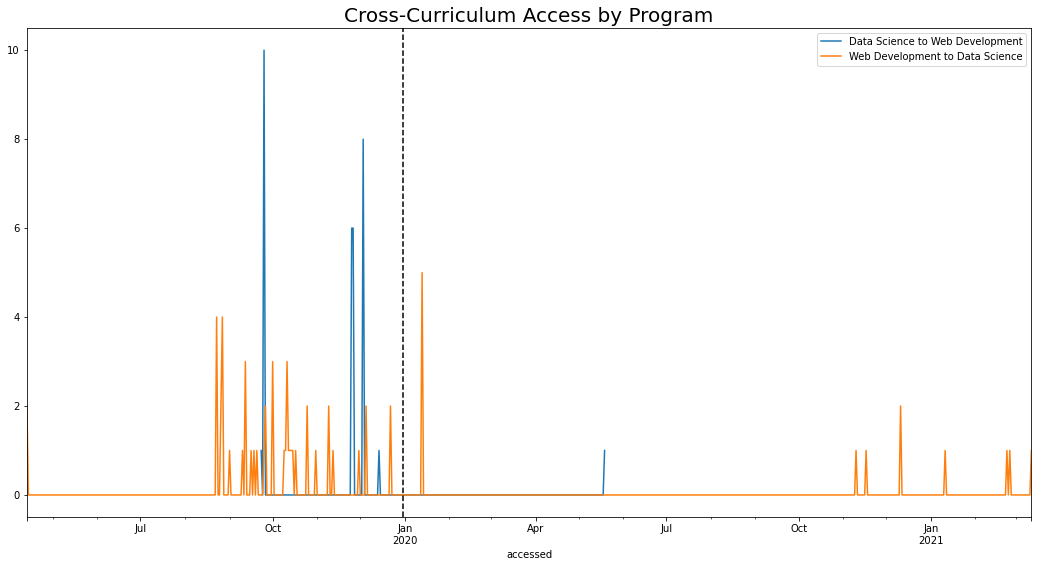

In [35]:
plt.figure(figsize = (18, 9))
daily_ds_to_wd_access_df.program_id.plot(label='Data Science to Web Development')
daily_wd_to_ds_access_df.program_id.plot(label='Web Development to Data Science')
plt.title('Cross-Curriculum Access by Program', fontsize=20)
plt.axvline(pd.Timestamp('2019-12-31'),color='black',ls='--')
plt.legend()
plt.show()

**Prior to the 2019 cross-curriculum shut down, there were multiple cross-curriculum views from both Data Science and Web Development Students.**
- After the expected shut down:
    - There was one Data Science student to Web Development curriculum access.
    - There were multiple Web Development to Data Science curriculum access.

#### Web Development Students viewing access to Data Science Curriculum

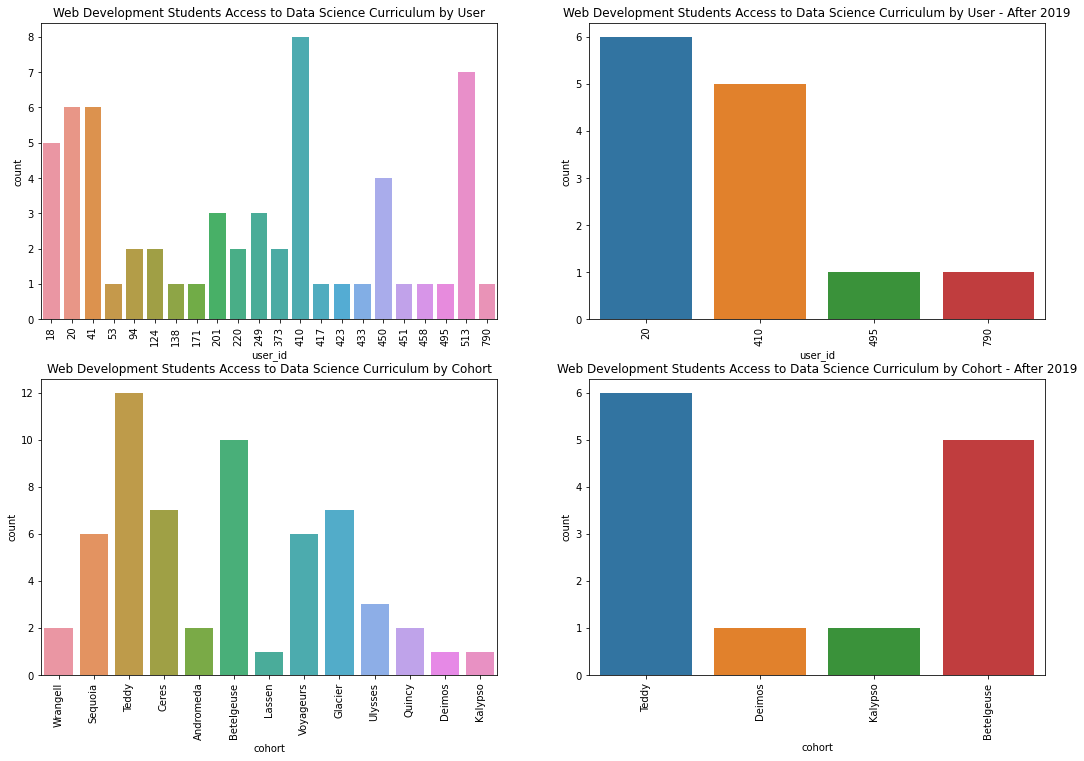

In [36]:
# view web development students that access data science by user id and cohort 
plt.figure(figsize = (18, 12))
plt.subplot(221)
sns.countplot(data=wd_to_ds_access_df, x=wd_to_ds_access_df.user_id)
plt.title('Web Development Students Access to Data Science Curriculum by User')
plt.xticks(rotation=90)

plt.subplot(222)
sns.countplot(data=after_2019, x=after_2019.user_id)
plt.title('Web Development Students Access to Data Science Curriculum by User - After 2019')
plt.xticks(rotation=90)

plt.subplot(223)
sns.countplot(data=wd_to_ds_access_df, x=wd_to_ds_access_df.cohort)
plt.title('Web Development Students Access to Data Science Curriculum by Cohort')
plt.xticks(rotation=90)

plt.subplot(224)
sns.countplot(data=after_2019, x=after_2019.cohort)
plt.title('Web Development Students Access to Data Science Curriculum by Cohort - After 2019')
plt.xticks(rotation=90)
plt.show()


**Notes:** Prior to 2019, 18 web development users accessed the data science curriculum. After the expected shut-off in 2019, four users continued to access the data science curriculum.

- User 220 accessed Data Science Program in April 2019. (Wrangle cohort, graduated Nov 2018)
- Accessed Data Science Program after 2019 cutoff:
    - User 20 - Teddy cohort, graduated May 2018, accessed Nov 2020 - Feb 2021. Viewed fundamentals.
    - User 410 - Betelgeuse cohort, graduated Oct 2019, accessed Jan 2020. Viewed fundamentals.
    - User 495 - Deimos cohort, graduated Feb 2020, accessed Nov 2020. Viewed fundamentals.
    - User 790 - Active student in Kalypso cohort, accessed in Mar 2021 (no lesson viewed).

#### Data Science Students accessing Web Development Curriculum

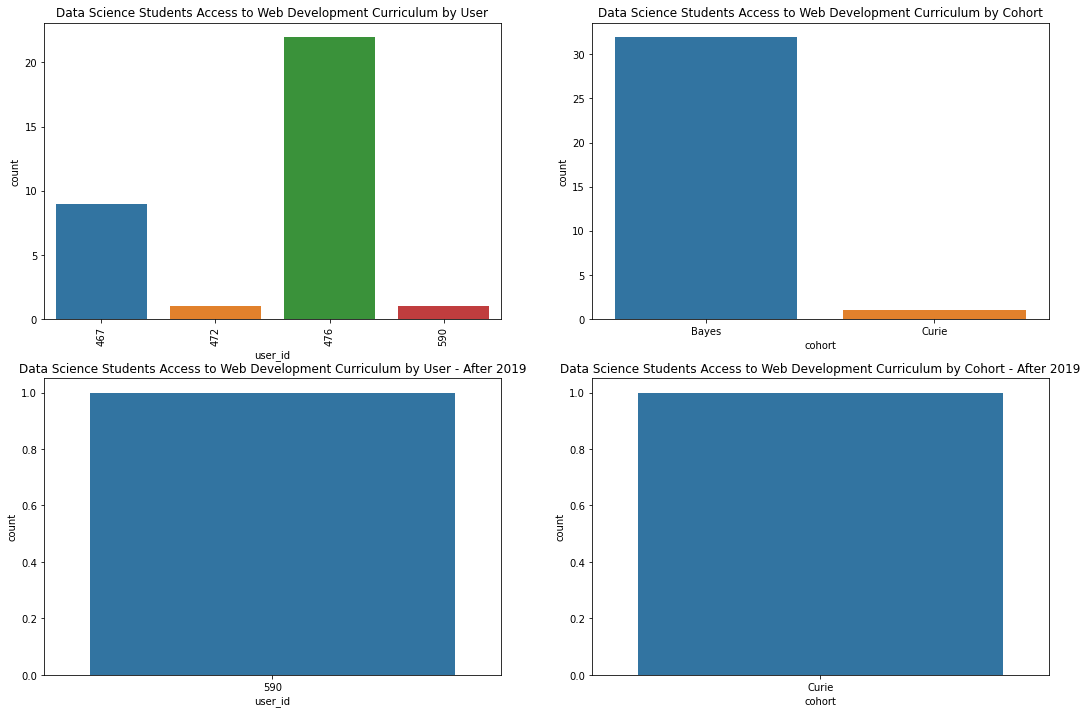

In [37]:
plt.figure(figsize = (18, 12))
plt.subplot(221)
sns.countplot(data=ds_to_wd_access_df, x=ds_to_wd_access_df.user_id)
plt.title('Data Science Students Access to Web Development Curriculum by User')
plt.xticks(rotation=90)

plt.subplot(222)
sns.countplot(data=ds_to_wd_access_df, x=ds_to_wd_access_df.cohort)
plt.title('Data Science Students Access to Web Development Curriculum by Cohort')

plt.subplot(223)
sns.countplot(data=ds_after_2019, x=ds_after_2019.user_id)
plt.title('Data Science Students Access to Web Development Curriculum by User - After 2019')

plt.subplot(224)
sns.countplot(data=ds_after_2019, x=ds_after_2019.cohort)
plt.title('Data Science Students Access to Web Development Curriculum by Cohort - After 2019')
plt.show()

**Most data science students accessing web development courses ended in 2019, but there was one cross-curriculum access in May 2020.**

**Notes:** Most users utilizing cross-curriculum were in the Bayes cohort and were active students at the time of accessing the curriculum, prior to the end of cross-curriculum access.
- The one outlier in May 2020 was in the Curie cohort.
- User 590: Accessed Web Development curriculum May 2020, viewed Java-II/object-oriented-programming.

## Question 6: What topics are grads continuing to reference after graduation and into their jobs (for each program)?

In [38]:
# Filters dataframes for program_types (web dev & data science) only after graduation date
grad_accessed_wd = wd[(wd.accessed > wd.end_date)]
grad_accessed_ds = ds[(ds.accessed > ds.end_date)]

In [39]:
# Returns the the top 5 lessons by web dev after graduation
grad_accessed_wd.lesson.value_counts()[1:6]

spring.fundamentals.controllers     959
spring.fundamentals.views           907
spring.setup                        892
spring.fundamentals.repositories    871
html-css.elements                   683
Name: lesson, dtype: int64

In [40]:
# Returns the top 5 lessons by data science after graduation
grad_accessed_ds.lesson.value_counts()[1:6]

search.search_index.json                          493
sql.mysql-overview                                275
classification.overview                           267
classification.scale_features_or_not.svg          220
anomaly-detection.AnomalyDetectionCartoon.jpeg    193
Name: lesson, dtype: int64

Text(0.5, 1.0, 'Topics Referenced after Graduation Data Science')

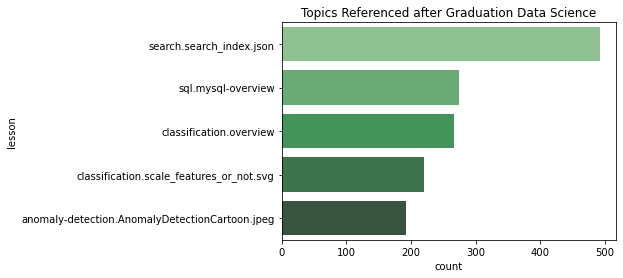

In [41]:
# plots the lessons on y-axis and counts on x-axis
sns.countplot(y="lesson", data=grad_accessed_ds, palette="Greens_d", 
              order=grad_accessed_ds.lesson.value_counts()[1:6].index)
plt.title("Topics Referenced after Graduation Data Science")

Text(0.5, 1.0, 'Topics Referenced after Graduation Web Development')

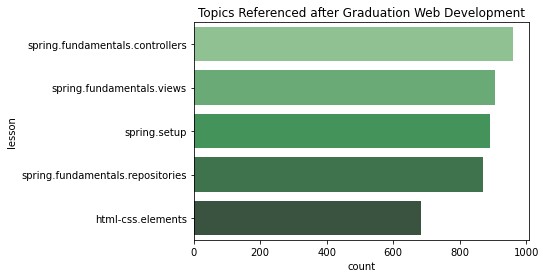

In [42]:
# plots the lessons on y-axis and counts on x-axis
sns.countplot(y="lesson", data=grad_accessed_wd, palette="Greens_d", 
              order=grad_accessed_wd.lesson.value_counts()[1:6].index)
plt.title("Topics Referenced after Graduation Web Development")

> ### Key Takeaway: 
> - **_Web Development_** graduates are referencing these top five lessons: 
>    - spring.fundamentals.controllers
>   - spring.fundamentals.views
>   - spring.setup
>   - spring.fundamentals.repositories
>   - html-css.elements
> - **_Data Science_** graduates are referencing these top five lessons:
>   - sql.mysql-overview                      
>   - classification.scale_features_or_not.svg   
>   - fundamentals.intro-to-data-science         
>   - anomaly-detection.overview                  
>   - 1-fundamentals.1.1-intro-to-data-science   

## Question 7: Which lessons are least accessed?

### Examining Web Development

Finding the least accessed lessons for Web Development cohorts is not starightforward.  There is a ton of noise, with lots of lessons having just a few accesses (many with just 1); in addition, cohorts have different sizes and a number are under-represented.  

Thus, we focused on finding the least accessed *Unit* for Web Development:

In [43]:
wd['unit'] = wd.path.str.split('/', expand=True)[0]
wd.unit.value_counts()[wd.unit.value_counts()>50].nsmallest(10)

introduction        52
git                 52
elements            54
1-fundamentals      62
prework            695
index.html        1080
web-design        1407
capstone          1847
slides            5993
content           6576
Name: unit, dtype: int64

> ### Key Takeaway: Not counting prework, it seems web-design is the least accessed unit in Web Development

### Examining Data Science

Data Science has tighter data, and therefore lends itself better for a more programmatic analysis.

Thus, we identified all lessons for every cohort and compared them against each other to determine which were 'common' to all cohorts - this should remove most of the noise.

In [44]:
# Create a list of DS cohorts
ds_cohorts = ds.groupby('cohort').lesson.nunique().index

# Now compare the lessons accessed in each cohort to see which have been accessed by all
setter = ds[ds.cohort == "Bayes"].lesson.unique()
for i in ds_cohorts:
    unit_list = ds[ds.cohort == i].lesson.unique()
    setter = list(set(setter).intersection(unit_list)) 

# Create a dataframe to display the least accessed 'common' lessons
qw = []
for n in setter:
    row = {}
    row['Lesson'] = n
    row['Count'] = df[df.lesson == n].accessed.count()
    qw.append(row)
pd.DataFrame(qw).set_index('Lesson').Count.nsmallest(10)

Lesson
search.search_index.json                                  0
appendix.data_science_community                           0
appendix.open_data                                        0
.                                                         0
appendix.coding-challenges.amateur                        0
fundamentals.diagram-of-ds-pipeline-fraud-example.jpeg    0
appendix.professional-development.professionalism-101     0
appendix.ds-environment-setup                             0
appendix.professional-development.linkedin-tips           0
appendix.vocabulary                                       0
Name: Count, dtype: int64

> ### Key Takeaway: Capstones/capstones was the least accessed lesson, followed by storytelling/creating-charts

### Question 8: Anything else I should be aware of?